In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress



In [2]:
# Load the data
attrition_df = pd.read_csv("raw_data/HR-Employee-Attrition.csv")
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition_df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1072,29,No,Travel_Frequently,410,Research & Development,2,1,Life Sciences,1,1513,...,3,80,3,4,3,3,3,2,0,2
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,...,1,80,1,6,2,2,2,0,2,0
236,33,Yes,Travel_Rarely,465,Research & Development,2,2,Life Sciences,1,328,...,1,80,0,13,3,4,9,7,1,7
116,34,No,Travel_Rarely,1354,Research & Development,5,3,Medical,1,153,...,4,80,0,14,6,3,11,10,5,8
956,56,No,Travel_Rarely,206,Human Resources,8,4,Life Sciences,1,1338,...,1,80,0,36,4,3,7,3,7,7


In [4]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Describe the data
attrition_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Distribution of employee attrition in the company  

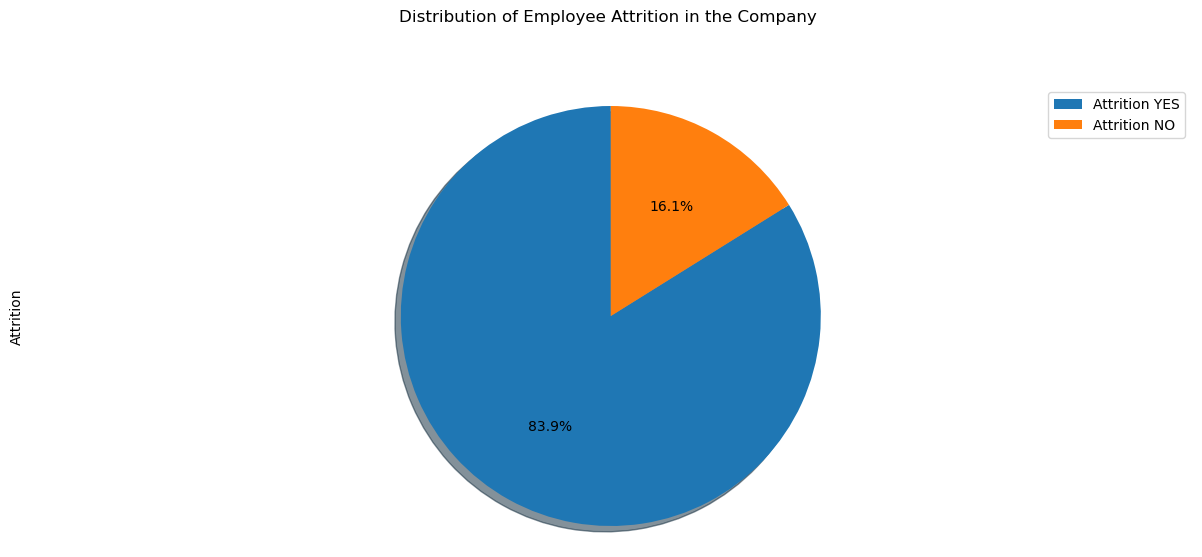

In [9]:
labels = 'Attrition YES','Attrition NO'
attrition_df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper right') 

# show plot
plt.show()


 ####  According the Pie Chart, we can say that out of 1470 employees, 16,1% of the    employees left their job with  some reasons while  other 83.9% of the employees preferred to    stay at their jobs

In [10]:
# Summarize the Data
employee_count = len(attrition_df)
attrition_rate = attrition_df.loc[attrition_df["Attrition"] == "Yes"]["Attrition"].count() / employee_count
gender_ratio_m = attrition_df.loc[attrition_df["Gender"] == "Male"]["Gender"].count() / employee_count
gender_ratio_f = attrition_df.loc[attrition_df["Gender"] == "Female"]["Gender"].count() / employee_count
avgyearswco = attrition_df["YearsAtCompany"].mean()
avgsatisfaction = attrition_df["JobSatisfaction"].mean()


summary_df = pd.DataFrame([{"Employee Count":employee_count,
                            "Attrition Rate":attrition_rate,
                            "Gender Ratio (Male)": gender_ratio_m,
                            "Gender Ratio (Female)": gender_ratio_f,
                            "Avg Years at Company": avgyearswco,
                            "Avg Job Satisfaction (out of 5)": avgsatisfaction
                           }])
summary_df

,Employee Count,Attrition Rate,Gender Ratio (Male),Gender Ratio (Female),Avg Years at Company,Avg Job Satisfaction (out of 5)
0,1470,0.161224,0.6,0.4,7.008163,2.728571


## Analysis by Gender

In [11]:
genda = attrition_df[['Gender', 'DistanceFromHome', 'Attrition']]
genda.head()


,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [12]:
genda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

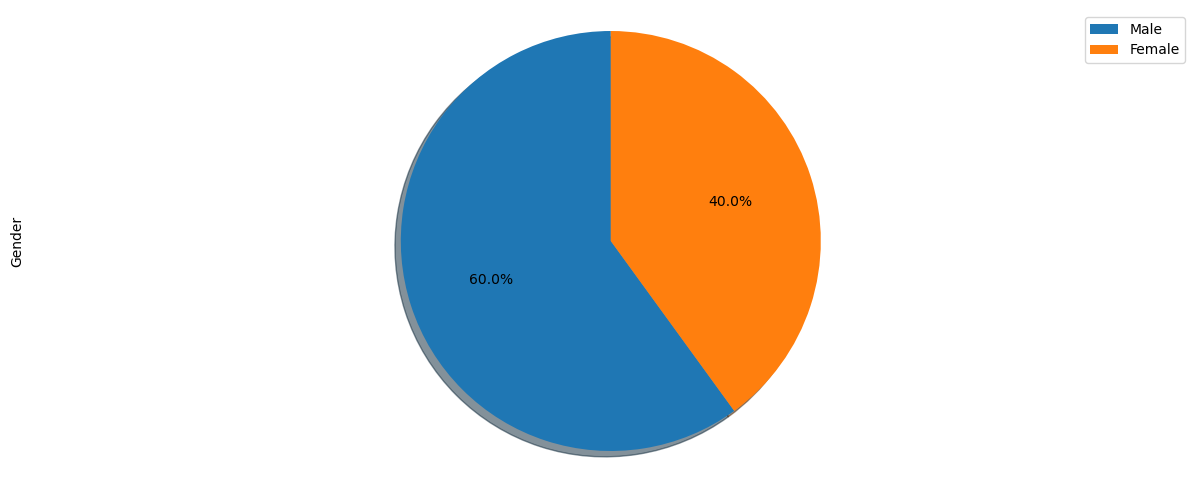

In [13]:
genda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper right') 

In [14]:
fem_male = genda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fem_male = fem_male.transpose()
fem_male

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [15]:
# Count od gender of employees by using marital Status
ms = attrition_df[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [16]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

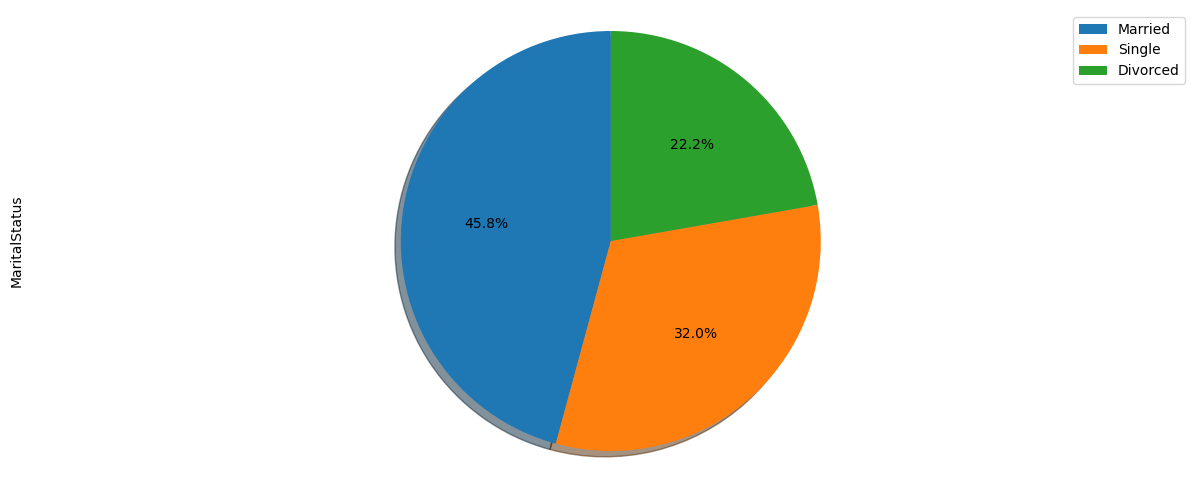

In [17]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                                     
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'],loc='upper right') 

## Analysis of Business Travel Feature

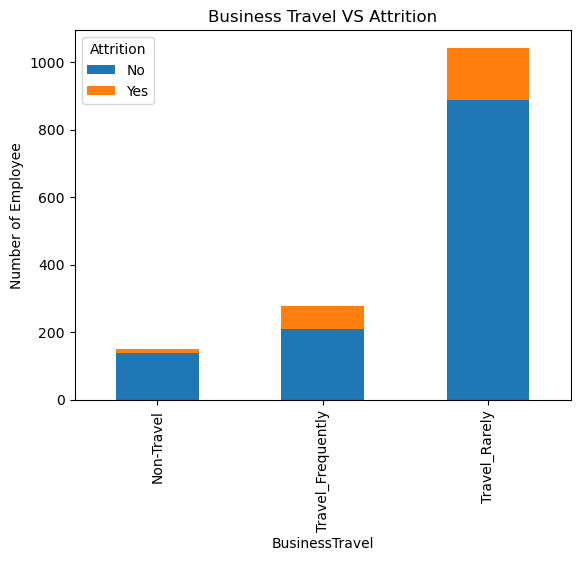

In [18]:
# B_Treveling vs Attrition

Trevel_vs_Attr =attrition_df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

Trevel_vs_Attr.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

#### We can say from the data above that Employees who travel rarely have more attrition rate followed by Employees who travel frequently.To reduce this attrition is to conduct survey and to assign travel





## Analysis of Monthly Income

In [19]:
monthly_i = attrition_df[attrition_df['Attrition']=='Yes']['MonthlyIncome']
monthly_i = monthly_i.reset_index()
monthly_i.drop(['index'], axis=1, inplace=True)


m_no = attrition_df[attrition_df['Attrition']=='No']['MonthlyIncome']
m_no = m_no.reset_index()
m_no.drop(['index'], axis=1, inplace=True)

monthly_i['m_no'] = m_no
monthly_i.rename(columns={'MonthlyIncome':'Yes', 'm_no':'No'}, inplace=True)
monthly_i.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


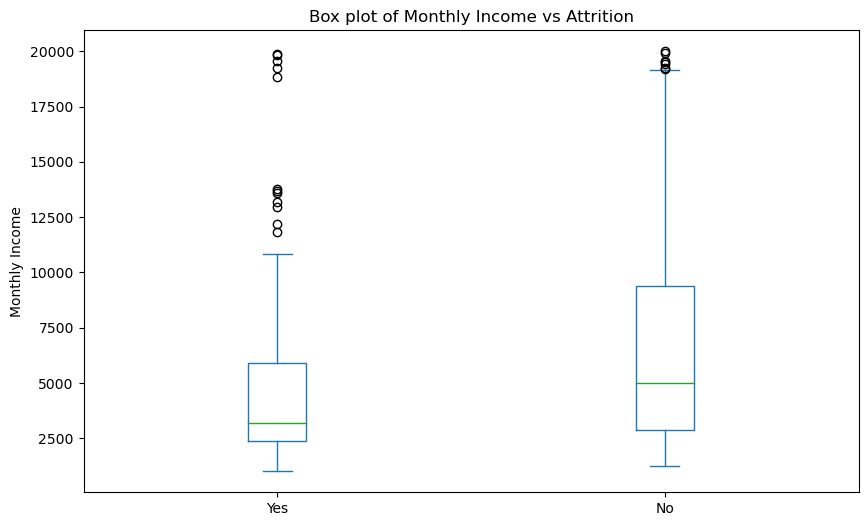

In [20]:
monthly_i.plot(kind='box', figsize=(10, 6))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

 ####         Employees who left their jobs tend to have low average monthly income than those who stayed 

In [21]:
# Bin Age
bins = [0,25,35,45,55,99]
group_names = ["0-25","25-35","35-45","45-55","55+"]

In [22]:
# create a binned_df to keep the raw data untouched
binned_df = attrition_df.copy()
binned_df["Attrition Rate"] = ""
for index, row in binned_df.iterrows():
    if row["Attrition"] == "Yes":
        binned_df.loc[index,"Attrition Rate"] = 1
    else:
        binned_df.loc[index,"Attrition Rate"] = 0

# Bin by age
binned_df["Age Bins"] = pd.cut(attrition_df["Age"],
                                bins,labels = group_names,
                                include_lowest = True)

# Identify which columns we wanna group by
jobsat = binned_df.groupby("Age Bins")["JobSatisfaction"].mean()
attritionrate = binned_df.groupby("Age Bins")["Attrition Rate"].mean()

# create an age_bin summary
age_bin_summary = pd.DataFrame({
    "Job Satisfaction":jobsat,
    "Attrition Rate": attritionrate
})
age_bin_summary



,Job Satisfaction,Attrition Rate
Age Bins,,
0-25,2.731707,0.357724
25-35,2.739274,0.191419
35-45,2.730769,0.091880
45-55,2.703540,0.115044
55+,2.680851,0.170213


<Axes: ylabel='Department'>

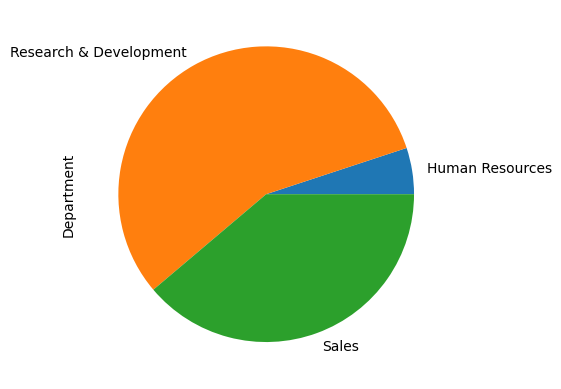

In [23]:
# Pie Chart - attrition by department
attrition_yes = attrition_df.loc[attrition_df["Attrition"] == "Yes"].groupby("Department")["Department"].count()

attrition_yes.plot.pie(y='Department')

The correlation between commute and time at the company is 0.01


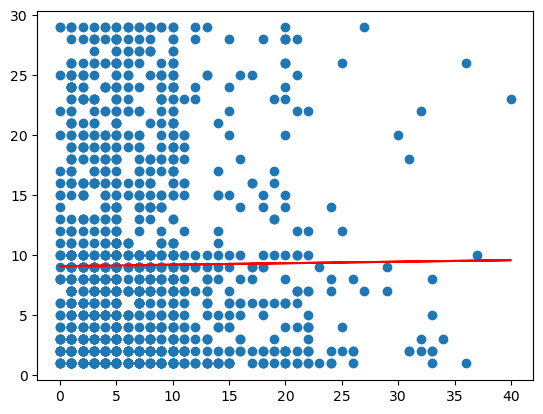

In [24]:
# Commute vs Time at the Company
# Correlation
correlation = st.pearsonr(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
print(f"The correlation between commute and time at the company is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsAtCompany"], attrition_df["DistanceFromHome"])
regress_values = attrition_df["YearsAtCompany"] * slope + intercept

# Plot
plt.scatter(attrition_df["YearsAtCompany"],attrition_df["DistanceFromHome"])
plt.plot(attrition_df["YearsAtCompany"],regress_values,"r-")
plt.show()

## Correlation and Regression

The correlation between age and monthly income is 0.5


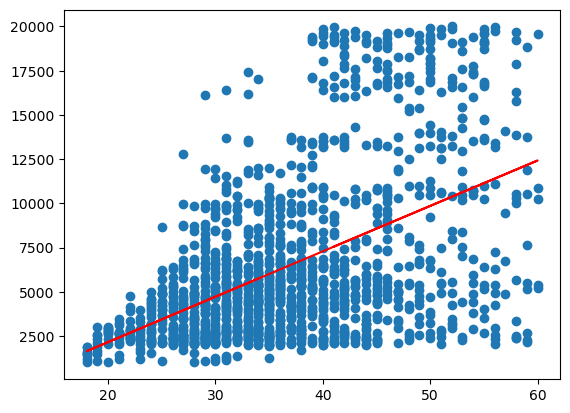

In [25]:
# Salary vs Age

# Correlation
correlation = st.pearsonr(attrition_df["Age"],attrition_df["MonthlyIncome"])
print(f"The correlation between age and monthly income is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["Age"], attrition_df["MonthlyIncome"])
regress_values = attrition_df["Age"] * slope + intercept

# Plot
plt.scatter(attrition_df["Age"],attrition_df["MonthlyIncome"])
plt.plot(attrition_df["Age"],regress_values,"r-")
plt.show()

## Analysis of Work Experience

In [26]:
work_exp = attrition_df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
work_exp.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


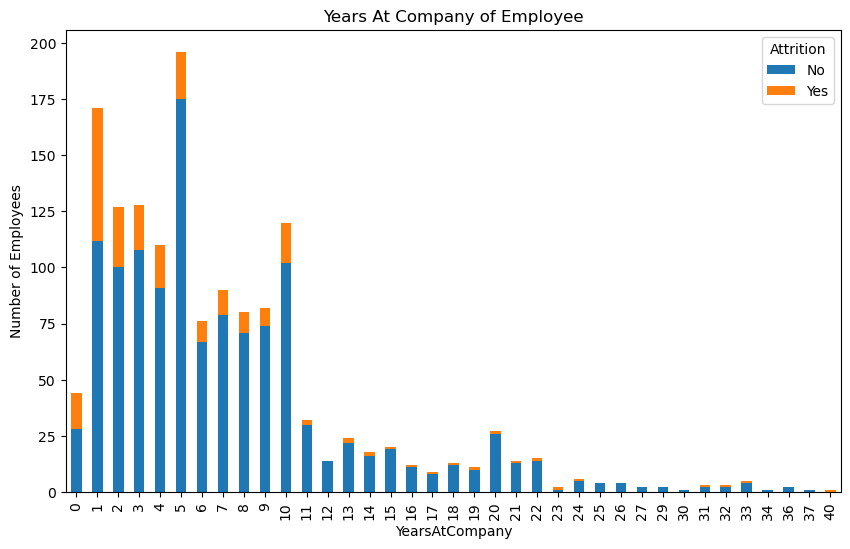

In [28]:
total_years = attrition_df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

total_years.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()


### According to this bar chart it is clear that most of newly employees quit ther jobs without having time to start (between 1 to 5 years ) . need to pay attention the new people who just got the job. 

## Over Time Employee Analysis

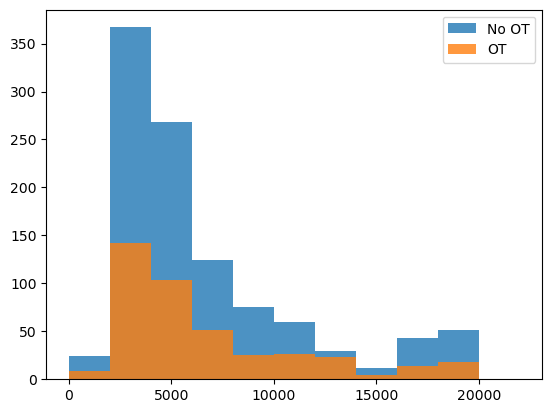

In [29]:
# Monthly Income vs OT
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]

plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No OT")
plt.hist(attrition_df.loc[(attrition_df["OverTime"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="OT")
plt.legend(loc='upper right')

plt.show()

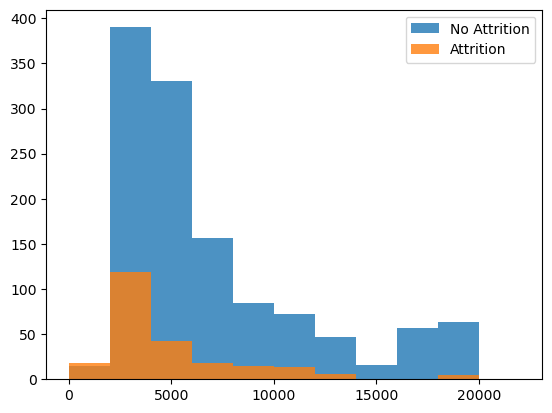

In [30]:
# Income vs Attrition ???

bins = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["MonthlyIncome"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["MonthlyIncome"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

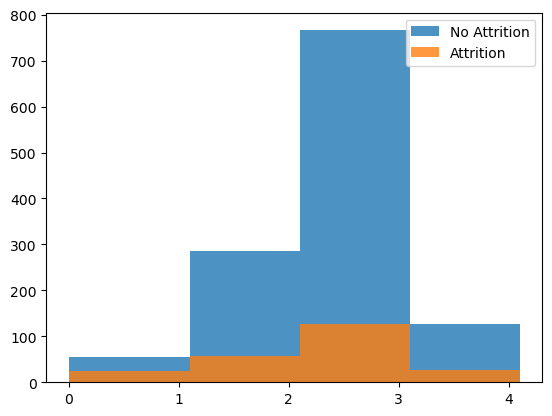

In [31]:
# Work-Life vs Attrition
bins = [0,1.1,2.1,3.1,4.1]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["WorkLifeBalance"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["WorkLifeBalance"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

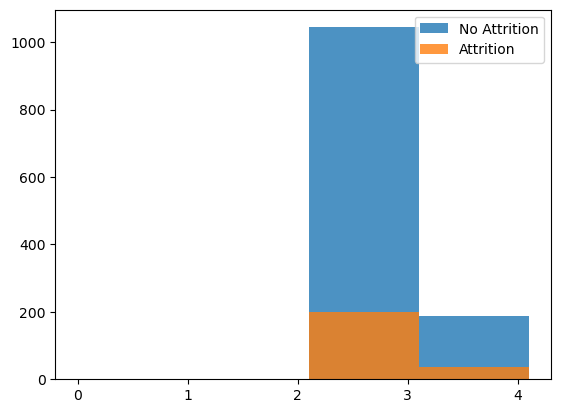

In [32]:
# Performance Rating vs Attrition

bins = [0,1.1,2.1,3.1,4.1]

plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="No")]["PerformanceRating"],bins,alpha=0.8,label="No Attrition")
plt.hist(attrition_df.loc[(attrition_df["Attrition"]=="Yes")]["PerformanceRating"],bins,alpha=0.8,label="Attrition")
plt.legend(loc='upper right')

plt.show()

The correlation between years in current role and years since last promotion is 0.55


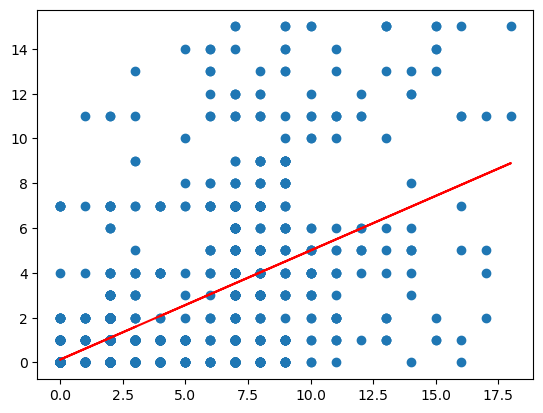

In [33]:
# Promotions over Time

# Correlation
correlation = st.pearsonr(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
print(f"The correlation between years in current role and years since last promotion is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(attrition_df["YearsInCurrentRole"], attrition_df["YearsSinceLastPromotion"])
regress_values = attrition_df["YearsInCurrentRole"] * slope + intercept

# Plot
plt.scatter(attrition_df["YearsInCurrentRole"],attrition_df["YearsSinceLastPromotion"])
plt.plot(attrition_df["YearsInCurrentRole"],regress_values,"r-")
plt.show()